# Projekt realizowany w ramach przedmiotu Metody Eksploracji Danych, Temat: Analiza Zbioru Danych Aplikacji Z Google Play Store Wraz Ze Stworzeniem Modelu Regresji Oceny i Ceny. 
## Autorzy: Marharyta Kruk, Bartosz Puszkarski

In [42]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Wstępna analiza danych

In [3]:
df = pd.read_csv("./dane/googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Analiza cen

In [6]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [7]:
def price_to_number(price):
    if price in ["0", "Everyone"]:
        return 0
    return float(price[1:])

price_number = df.copy()
price_number["Price"] = df["Price"].apply(price_to_number)
print(sorted(price_number["Price"].unique()))


[0.0, 0.99, 1.0, 1.04, 1.2, 1.26, 1.29, 1.49, 1.5, 1.59, 1.61, 1.7, 1.75, 1.76, 1.96, 1.97, 1.99, 2.0, 2.49, 2.5, 2.56, 2.59, 2.6, 2.9, 2.95, 2.99, 3.02, 3.04, 3.08, 3.28, 3.49, 3.61, 3.88, 3.9, 3.95, 3.99, 4.29, 4.49, 4.59, 4.6, 4.77, 4.8, 4.84, 4.85, 4.99, 5.0, 5.49, 5.99, 6.49, 6.99, 7.49, 7.99, 8.49, 8.99, 9.0, 9.99, 10.0, 10.99, 11.99, 12.99, 13.99, 14.0, 14.99, 15.46, 15.99, 16.99, 17.99, 18.99, 19.4, 19.9, 19.99, 24.99, 25.99, 28.99, 29.99, 30.99, 33.99, 37.99, 39.99, 46.99, 74.99, 79.99, 89.99, 109.99, 154.99, 200.0, 299.99, 379.99, 389.99, 394.99, 399.99, 400.0]


In [184]:
grouped_price = price_number[price_number['Type']=='Paid']

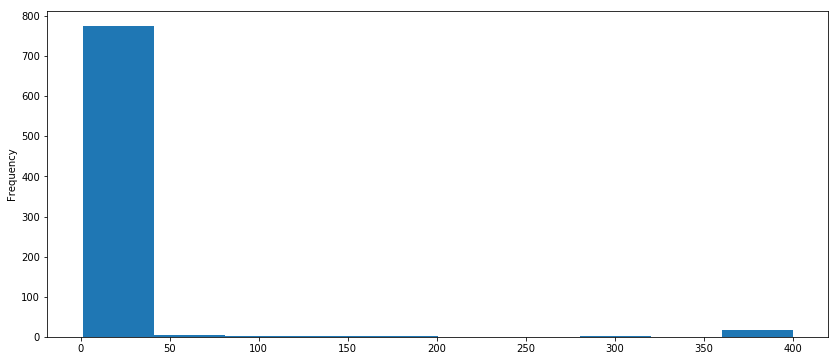

In [188]:
plt.figure(figsize=(14, 6))
grouped_price['Price'].plot.hist()

In [191]:
most_expansive = grouped_price[grouped_price['Price']>370]
most_expansive

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1.5M,100+,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,"10,000+",Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,"10,000+",Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,"100,000+",Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,"10,000+",Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,"50,000+",Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.9M,"1,000+",Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22M,"1,000+",Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965k,"5,000+",Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
5362,I Am Rich Pro,FAMILY,4.4,201,2.7M,"5,000+",Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up


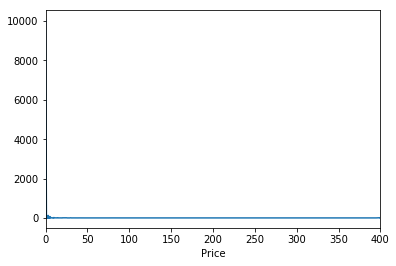

In [177]:
grouped_price = price_number.groupby("Price").count()
grouped_price["App"].index
grouped_price["App"].plot()


Jak widać nie ma za wiele drogich aplikacji

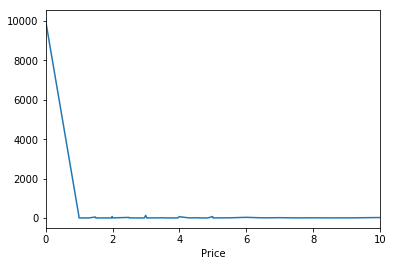

In [9]:
grouped_price.drop([10.99, 11.99, 12.99, 13.99, 14.0, 14.99, 15.46, 15.99, 16.99, 17.99, 18.99, 19.4, 19.9, 19.99, 24.99, 25.99, 28.99, 29.99, 30.99, 33.99, 37.99, 39.99, 46.99, 74.99, 79.99, 89.99, 109.99, 154.99, 200.0, 299.99, 379.99, 389.99, 394.99, 399.99, 400.0])["App"].plot()

In [10]:
total = grouped_price["App"].sum()
less_than_one_and_a_half = grouped_price["App"].loc[0:1.5].sum()
print("Aplikacje o cenie < 1.5 $ stanowią", less_than_one_and_a_half / total, "% całości")

Aplikacje o cenie < 1.5 $ stanowią 0.9448390369892077 % całości


## Analiza ratingu

In [192]:
df["Rating"].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

### Wyrzucamy anomalię

In [193]:
anomaly = df["Rating"] == 19.0
df[anomaly]
df = df.drop(df.index[df["Rating"].idxmax()])

In [194]:
df["Rating"].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       5. , 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

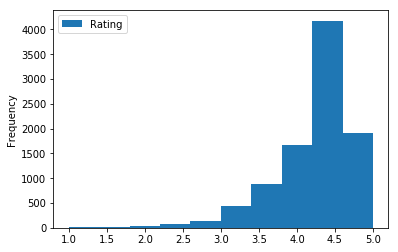

In [195]:
df.plot.hist(by="Rating")

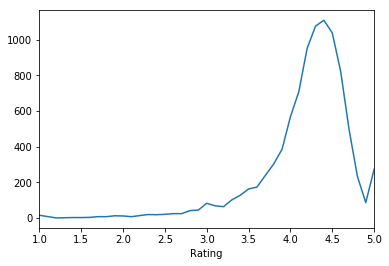

In [61]:
counted_ratings = dfd.groupby("Rating").count()["App"]
counted_ratings.plot()

In [75]:
wrongs = 0
for i in df["Reviews"].unique():
    try: 
        int(i)
    except ValueError:
        wrongs += 1
        print("Wartość nie jest liczbą: ", i)
        
print("Kolumna zawiera: ", wrongs, " wartości, które nie są liczbami.")

Kolumna zawiera:  0  wartości, które nie są liczbami.


In [76]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

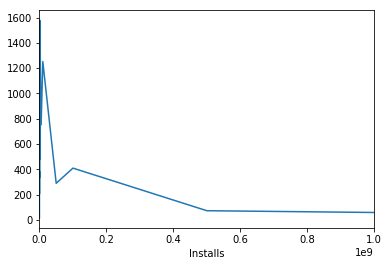

In [77]:
def installs_to_int(install):
    if install in ["0", "0+", "Free"]:
        return 0
    install = install.replace(",", "")[:-1]
    return int(install)


with_installs_as_integers = df.copy()
with_installs_as_integers["Installs"] = df["Installs"].apply(installs_to_int)

counted = with_installs_as_integers.groupby("Installs").count()
counted["App"].plot()

Obcięcie skrajnie największych wartości


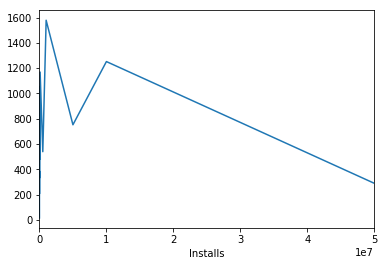

In [78]:
print("Obcięcie skrajnie największych wartości")
counted["App"][:-3].plot()


## Typ aplikacji(płatna/bezpłatna)

In [79]:
df["Type"].unique()

array(['Free', 'Paid', nan], dtype=object)

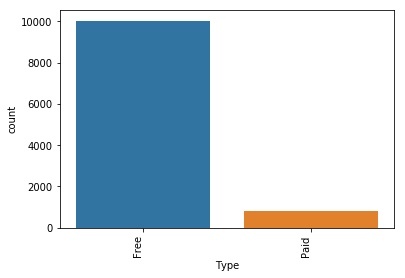

In [187]:
g = sns.countplot(x='Type', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g

### Większość aplikacji jest bezpłatna

In [173]:
paid = df[df['Type']=='Paid']
free = df[df['Type']=='Free']
paid = paid[['Type', 'Rating']].groupby(by='Type').mean()
free = free[['Type', 'Rating']].groupby(by='Type').mean()
print(f'Średni rating dla płatnych: {paid.iloc[0, 0]} Średni rating dla bezpłatnych: {free.iloc[0, 0]}')

Średni rating dla płatnych: 4.266615146831529 Średni rating dla bezpłatnych: 4.186202546163562


## Wesji

In [174]:
df["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

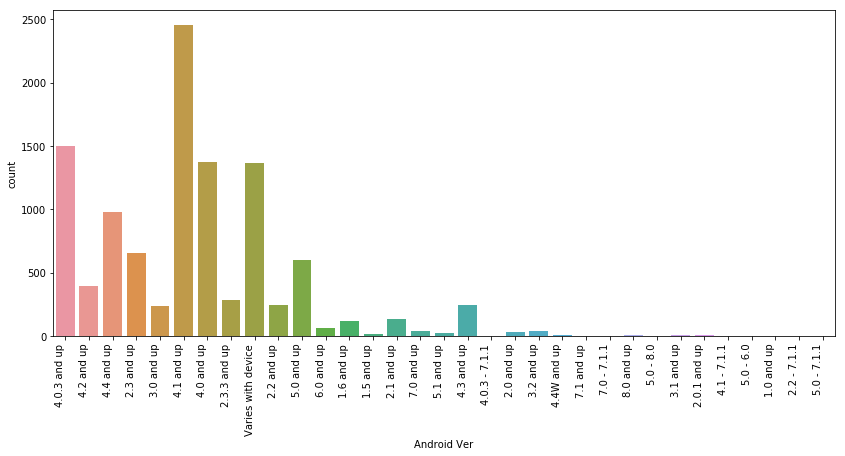

In [197]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x='Android Ver', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g

## Rating kontentu

In [81]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

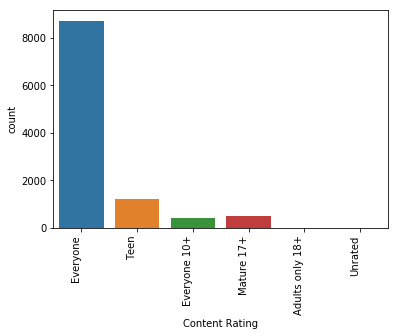

In [93]:
g = sns.countplot(x='Content Rating', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g

Najmniej oceniania: Unrated, najbardziej oceniania: Adults only 18+


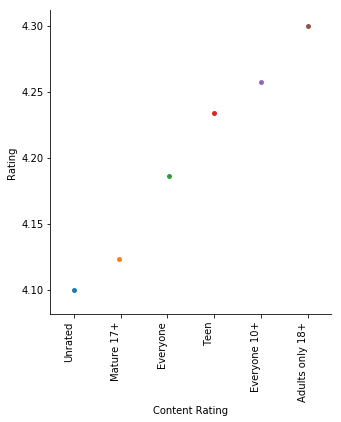

In [152]:
categories = df[['Content Rating', 'Rating']].groupby('Content Rating').mean()
categories_sorted = categories.sort_values(by='Rating')
najm = categories_sorted.idxmin()['Rating']
najw = categories_sorted.idxmax()['Rating']
print(f'Najmniej oceniania: {najm}, najbardziej oceniania: {najw}')
categories_sorted.reset_index(inplace=True)
g = sns.catplot(x='Content Rating', y='Rating', data=categories_sorted)
g.set_xticklabels(rotation=90, ha="right")
g

In [199]:
df[df['Content Rating'] == 'Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7312,Best CG Photography,FAMILY,NaN,1,2.5M,500+,Free,0,Unrated,Entertainment,"June 24, 2015",5.2,3.0 and up
8266,DC Universe Online Map,TOOLS,4.1,1186,6.4M,"50,000+",Free,0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up


Te dwie próbki nie wyglądają na coś istotnego, więc można to wyrzucić? 

## Rodzaje aplikacji

In [87]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

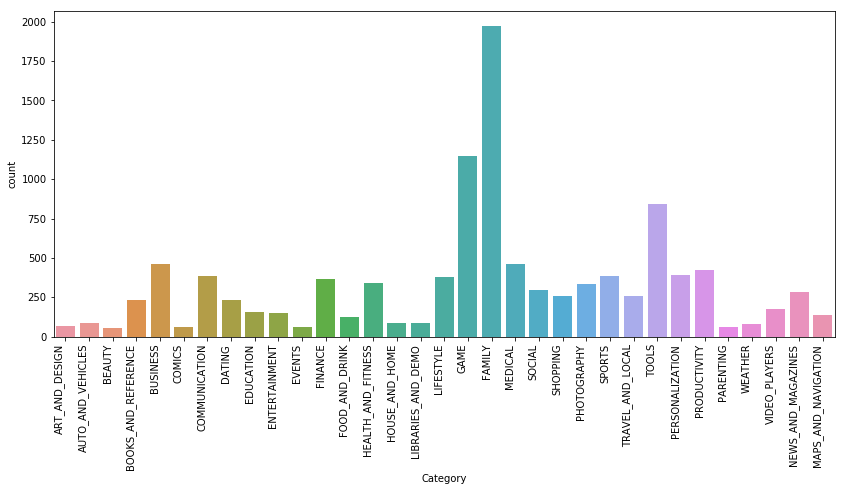

In [147]:
plt.figure(figsize=(14, 6))
g = sns.countplot(x='Category', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g

Najmniej oceniana: DATING, najbardziej oceniana: EVENTS


<Figure size 1296x432 with 0 Axes>

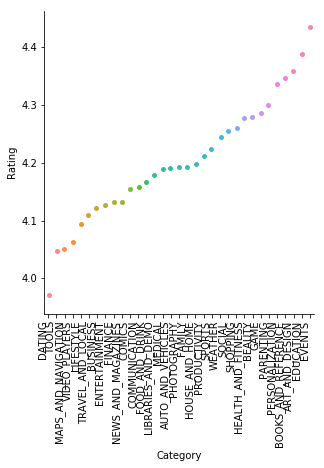

In [150]:
categories = df[['Category', 'Rating']].groupby('Category').mean()
categories_sorted = categories.sort_values(by='Rating')
najm = categories_sorted.idxmin()['Rating']
najw = categories_sorted.idxmax()['Rating']
print(f'Najmniej oceniana: {najm}, najbardziej oceniana: {najw}')
categories_sorted.reset_index(inplace=True)
g = sns.catplot(x='Category', y='Rating', data=categories_sorted)
g.set_xticklabels(rotation=90, ha="right")
g

## Gatunki

In [201]:
df['Genres'].value_counts()

Tools                                  842
Entertainment                          623
Education                              549
Medical                                463
Business                               460
Productivity                           424
Sports                                 398
Personalization                        392
Communication                          387
Lifestyle                              381
Finance                                366
Action                                 365
Health & Fitness                       341
Photography                            335
Social                                 295
News & Magazines                       283
Shopping                               260
Travel & Local                         257
Dating                                 234
Books & Reference                      231
Arcade                                 220
Simulation                             200
Casual                                 193
Video Playe

Chyba można rozbić ostatnie dane po ; i połączyć w większe grupy


## Last updated

Trochę przekształcam dane w taki sposób, aby pokazywały, ile czasu minęło z ostatniego update'u. 

In [206]:
df['Last updated2'] = pd.to_datetime(df['Last Updated'])
df['Last updated2'].describe()
df['Last updated2'] = (df['Last updated2'] -  df['Last updated2'].max()).dt.days
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last updated2
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,-213
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,-205
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,-7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,-61
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,-49
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,-500
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,-104
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,-55
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,-322
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,-36


##  Pierwsze wnioski:
- Mamy 9367 niepustych obiektów w interesującej nas kolumnie **Rating**, wartości docelowo powinny wachać się w przedziale 1.0 -5.0, ale znajduje się jedna wartość 19.0.
- Z analizy kwantyli wynika, że ponad **75%** wszystkich istniejących **Ratingów** ma wartość **równą bądź wyższą 4.0**, bezpiecznym jest zatem stwierdzenie, ze możemy zastąpić brakujace wartości wartością równą medianie ( 4.30 )
- Wszystkie rekordy mają wartość w kolumnie **Price**, jest to jednak obecnie napis - zawiera symbol dolara plus wartość liczbową, znajduje się także etykieta Everyone. Wszystkie wartości możemy zastąpić zwykłą wartością liczbową pozbywając sie symbolu waluty, a wartość Everyone zastąpić zerem.
- Wartości w kolumnie **Reviews** są liczbami, z 1 wyjątkiem, który można po prostu zastąpić wartością liczbową 3.0M - 3 000 000 
- Kolumna **Installs** zawiera wartości kategoryczne, nie ciągłe! Co więcej dominują mało popularne aplikacje.
- Kolumna **Type** zawiera jedynie informację czy aplikacja jest płatna, czy darmowa - można zastąpić binarną reprezentacją.


In [83]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
